In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the Titanic dataset from Seaborn

In [8]:
df = sns.load_dataset('titanic')

2. Initial Inspection

In [9]:
print("\n--- HEAD ---")
print(df.head())

print("\n--- INFO ---")
print(df.info())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


--- HEAD ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   


3. Visualize missing values

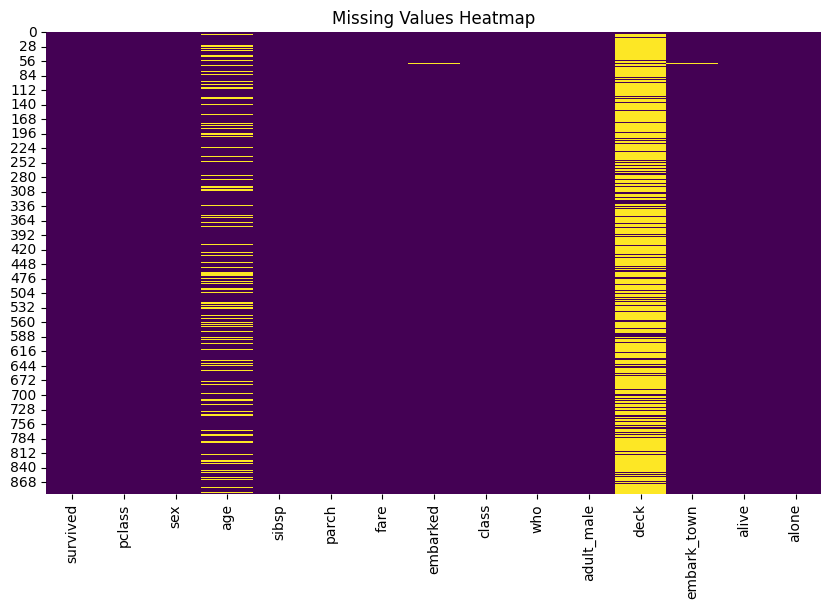

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

4. Handle missing values

In [11]:
## a) Age → fill missing values with median
df['age'].fillna(df['age'].median(), inplace=True)

## b) Cabin → drop column (too many missing values)
df.drop(columns=['cabin'], inplace=True, errors='ignore')

## c) Embarked → fill missing with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Verify missing values handled
print("\n--- MISSING VALUES AFTER IMPUTATION ---")
print(df.isnull().sum())


--- MISSING VALUES AFTER IMPUTATION ---
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


5. Create new feature: Is_Alone

In [12]:
df['is_alone'] = (df['sibsp'] + df['parch'] == 0).astype(int)

 6. Quick visualizations

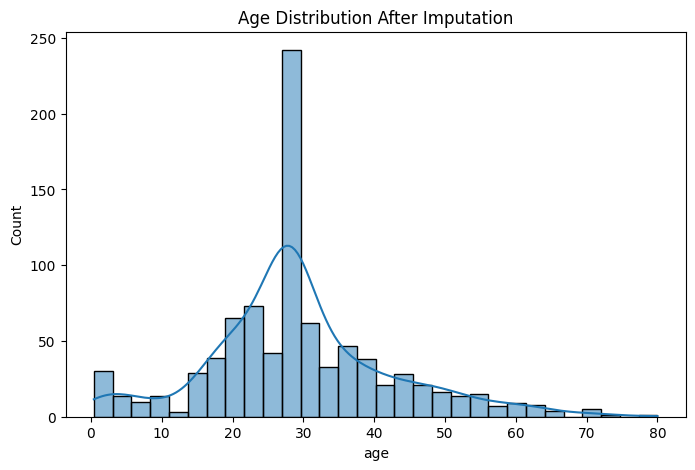

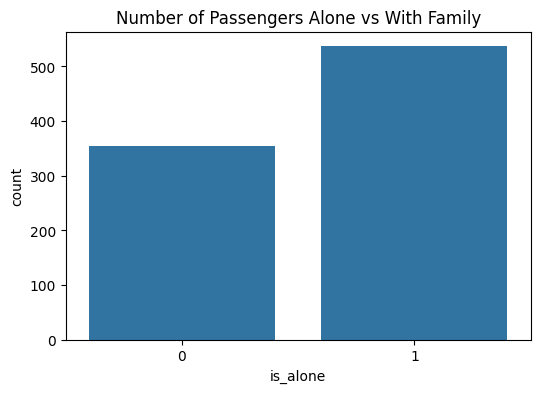

In [13]:
## Age distribution after imputation
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution After Imputation")
plt.show()

## Countplot for Is_Alone
plt.figure(figsize=(6,4))
sns.countplot(x='is_alone', data=df)
plt.title("Number of Passengers Alone vs With Family")
plt.show()

7. Summary of dataset after cleaning

In [14]:
print("\n--- CLEANED DATA ---")
print(df.head())


--- CLEANED DATA ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  is_alone  
0    man        True  NaN  Southampton    no  False         0  
1  woman       False    C    Cherbourg   yes  False         0  
2  woman       False  NaN  Southampton   yes   True         1  
3  woman       False    C  Southampton   yes  False         0  
4    man        True  NaN  Southampton    no   True         1  
